# FAIMED 3D
> use fastai to quickly train fully three-dimensional models on radiological data

## Classification

In [ ]:
from faimed3d.all import *

Load data in various medical formats (DICOM, NIfTI, NRRD) or even videos as simple as in fastai.

In [ ]:
d = pd.read_csv('../data/radiopaedia_cases.csv')
dls = ImageDataLoaders3D.from_df(d,
                                 item_tfms = Resize3D((20, 112, 112)),
                                 batch_tfms = aug_transforms_3d(), 
                                 bs = 2, val_bs = 2)

Faimed3d provides multiple model architectures, pretrained on the [UCF101](https://paperswithcode.com/sota/action-recognition-in-videos-on-ucf101) dataset for action recoginiton, which can be used for transfer learning. 

| Model           | 3-fold accuracy | duration/epoch |   model size     |
|-----------------|-----------------|----------------|------------------|
| efficientnet b0 | 92.5 %          | 9M:35S         | 48.8 MB          |
| efficientnet b1 | 90.1 %          | 13M:20S        | 80.5 MB          |
| resnet 18       | 87.6 %          | 6M:57S         | 339.1 MB         |
| resnet 50       | 94.8 %          | 12M:16S        | 561.2 MB         |
| resnet 101      | 96.0 %          | 17M:20S        | 1,030 MB         |

In [ ]:
# slow
learn = cnn_learner_3d(dls, efficientnet_b0) 

SuggestedLRs(lr_min=0.014454397559165954, lr_steep=6.309573450380412e-07)

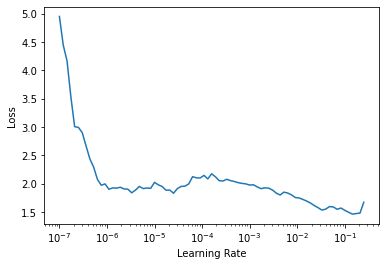

In [ ]:
# slow
learn.lr_find()

Click [here](../examples/3d_classification.md) for a more in-depth classification example. 

## Segmentation

In [ ]:
dls = SegmentationDataLoaders3D.from_df(d,
                                 item_tfms = Resize3D((20, 112, 112)),
                                 batch_tfms = aug_transforms_3d(), 
                                 bs = 2, val_bs = 2)

All models in faimed3d can be used as a backbone for U-Nets, even with pre-trained weights. 

In [ ]:
# slow
learn = unet_learner_3d(dls, efficientnet_b0, n_out = 2) 

SuggestedLRs(lr_min=0.33113112449646, lr_steep=0.10000000149011612)

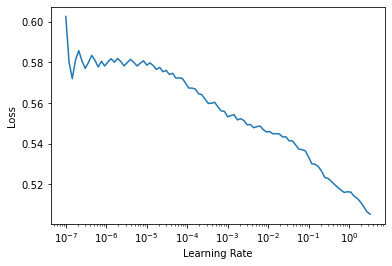

In [ ]:
# slow 
learn.lr_find()

Click [here](../examples/3d_segmentation.md) for a more in-depth segmentation example. 